# Initialization

## Read Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
train = pd.read_csv('../input/train.csv', index_col="Id")
test = pd.read_csv('../input/test.csv', index_col="Id")


train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Grouping features

In [7]:
# convert MSSubClass to an object
train['MSSubClass'] = train['MSSubClass'].astype(str)

### 1. Numerical Continuous Features (measured on a continuous scale)

In [10]:
numerical_continuous_features = [
    'LotFrontage',
    'LotArea',
    'YearBuilt',
    'YearRemodAdd',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtFinSF2',                   
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'LowQualFinSF',
    'GrLivArea',
    'GarageYrBlt',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch',
    'PoolArea',
    'MiscVal',
    'YrSold'
]

### 	2.	Numerical Discrete Features (countable numbers, often with many unique values or representing dates)


In [13]:
numerical_discrete_features = [ 
    'OverallQual',
    'OverallCond',
    'BsmtFullBath',
    'BsmtHalfBath', 
    'FullBath',
    'HalfBath',
    'BedroomAbvGr',
    'KitchenAbvGr',
    'TotRmsAbvGrd',
    'Fireplaces',
    'GarageCars',
    'MoSold'
] 

### 	3.	Ordinal Categorical Features (categorical features with a natural order)


In [16]:
ordinal_categorical_features = [
    "LotShape",      # Regular > Slightly Irregular > Moderately Irregular > Irregular
    "Utilities",     # (e.g., ELO < NoSeWa < NoSewr < AllPub) as mapped
    "LandSlope",     # (Gtl > Mod > Sev)
    "ExterQual",     # (Po < Fa < TA < Gd < Ex)
    "ExterCond",     # (Po < Fa < TA < Gd < Ex)
    "BsmtQual",      # (NA < Po < Fa < TA < Gd < Ex)
    "BsmtCond",      # (NA < Po < Fa < TA < Gd < Ex)
    "BsmtExposure",  # (NA < No < Mn < Av < Gd)
    "BsmtFinType1",  # (NA < Unf < LwQ < Rec < BLQ < ALQ < GLQ)
    "BsmtFinType2",  # (NA < Unf < LwQ < Rec < BLQ < ALQ < GLQ)
    "HeatingQC",     # (Po < Fa < TA < Gd < Ex)
    "KitchenQual",   # (Po < Fa < TA < Gd < Ex)
    "Functional",    # (Sal < Sev < Maj2 < Maj1 < Mod < Min2 < Min1 < Typ)
    "FireplaceQu",   # (NA < Po < Fa < TA < Gd < Ex)
    "GarageFinish",  # (NA < Unf < RFn < Fin)
    "GarageQual",    # (NA < Po < Fa < TA < Gd < Ex)
    "GarageCond",    # (NA < Po < Fa < TA < Gd < Ex)
    "PavedDrive",    # (N < P < Y)
    "PoolQC",        # (NA < Fa < TA < Gd < Ex)
    "Fence"          # (NA < MnWw < GdWo < MnPrv < GdPrv)
]

In [18]:
ordinal_mappings = {
    "LotShape":      {"IR3":1, "IR2":2, "IR1":3, "Reg":4},
    "Utilities":     {"ELO":1, "NoSeWa":2, "NoSewr":3, "AllPub":4},
    "LandSlope":     {"Sev":1, "Mod":2, "Gtl":3},
    "ExterQual":     {"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5},
    "ExterCond":     {"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5},
    "BsmtQual":      {"NA":1, "Po":2, "Fa":3, "TA":4, "Gd":5, "Ex":6},
    "BsmtCond":      {"NA":1, "Po":2, "Fa":3, "TA":4, "Gd":5, "Ex":6},
    "BsmtExposure":  {"NA":1, "No":2, "Mn":3, "Av":4, "Gd":5},
    "BsmtFinType1":  {"NA":1, "Unf":2, "LwQ":3, "Rec":4, "BLQ":5, "ALQ":6, "GLQ":7},
    "BsmtFinType2":  {"NA":1, "Unf":2, "LwQ":3, "Rec":4, "BLQ":5, "ALQ":6, "GLQ":7},
    "HeatingQC":     {"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5},
    "KitchenQual":   {"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5},
    "Functional":    {"Sal":1, "Sev":2, "Maj2":3, "Maj1":4, "Mod":5, "Min2":6, "Min1":7, "Typ":8},
    "FireplaceQu":   {"NA":1, "Po":2, "Fa":3, "TA":4, "Gd":5, "Ex":6},
    "GarageFinish":  {"NA":1, "Unf":2, "RFn":3, "Fin":4},
    "GarageQual":    {"NA":1, "Po":2, "Fa":3, "TA":4, "Gd":5, "Ex":6},
    "GarageCond":    {"NA":1, "Po":2, "Fa":3, "TA":4, "Gd":5, "Ex":6},
    "PavedDrive":    {"N":1, "P":2, "Y":3},
    "PoolQC":        {"NA":1, "Fa":2, "TA":3, "Gd":4, "Ex":5},
    "Fence":         {"NA":1, "MnWw":2, "GdWo":3, "MnPrv":4, "GdPrv":5}
}

### 	4.	Nominal Categorical Features (categorical features without an inherent order)

In [21]:
nominal_categorical_features = [
    "MSSubClass",    # Type of dwelling involved in the sale (reclassified as nominal)
    "MSZoning",      # General zoning classification
    "Street",        # Type of road access (e.g., Gravel, Paved)
    "Alley",         # Alley access type
    "LandContour",   # Flatness of the property (e.g., Lvl, Bnk, HLS, Low)
    "LotConfig",     # Lot configuration (e.g., Inside, Corner, CulDSac, FR2, FR3)
    "Neighborhood",  # Physical locations within Ames city limits
    "Condition1",    # Proximity to various conditions
    "Condition2",    # Proximity to various conditions (if more than one)
    "BldgType",      # Type of dwelling
    "HouseStyle",    # Style of dwelling
    "RoofStyle",     # Type of roof
    "RoofMatl",      # Roof material
    "Exterior1st",   # Primary exterior covering
    "Exterior2nd",   # Secondary exterior covering
    "MasVnrType",    # Masonry veneer type
    "Foundation",    # Type of foundation
    "Heating",       # Type of heating
    "Electrical",    # Electrical system
    "GarageType",    # Garage location/type
    "MiscFeature",   # Miscellaneous feature (if any)
    "SaleType",      # Type of sale
    'CentralAir',
    "SaleCondition"  # Condition of sale
]

# DATA CLEANING

## Outliers

In [37]:
# List of variables for which to remove outliers
variables = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 
             'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 
             'YearBuilt', 'YearRemodAdd']

# Function to remove outliers using the IQ R method for a given column
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


for col in variables:
    train = remove_outliers(train, col)


# FEATURE ENGINEERING

## Add new Features

In [44]:
train['Years_Since_Remod'] = train['YrSold'] - train['YearRemodAdd']
train['Age']               = train['YrSold'] - train['YearBuilt']
train['Newness']           = train['Age'] * train['Years_Since_Remod']
train['Total_Home_Quality'] = train['OverallQual'] + train['OverallCond']

numerical_discrete_features.extend([
    'Years_Since_Remod', 
    'Age', 
    'Newness', 
    'Total_Home_Quality'
])

## Log-Transform target

In [47]:
train['SalePrice'] = np.log1p(train['SalePrice'])

# Preprocessing

### Drop multi-collinearity

In [51]:
drop_list_multi_coll = ["GarageYrBlt", "GarageArea", "GrLivArea", "TotalBsmtSF"]

### Drop Top 6 missings

In [54]:
drop_list_missing = ["PoolQC", "MiscFeature", "Alley", "Fence", "MasVnrType","FireplaceQu"]

In [56]:
drop_list = drop_list_multi_coll + drop_list_missing
train = train.drop(columns=[col for col in drop_list if col in train.columns], errors='ignore')

In [58]:
# Remove the variables from the feature lists
numerical_continuous_features = [
    feature for feature in numerical_continuous_features if feature not in drop_list
]
numerical_discrete_features = [
    feature for feature in numerical_discrete_features if feature not in drop_list
]
ordinal_categorical_features = [
    feature for feature in ordinal_categorical_features if feature not in drop_list
]
nominal_categorical_features = [
    feature for feature in nominal_categorical_features if feature not in drop_list
]

# Remove the variables from the ordinal_mappings dictionary (if present)
for feature in drop_list:
    ordinal_mappings.pop(feature, None)

# Pipeline 

### Pipelines for Each Group

#### outlier removal functions

In [63]:
from sklearn.base import BaseEstimator, TransformerMixin

In [65]:
class IQRFilterDF(BaseEstimator, TransformerMixin):
    def __init__(self, columns, multiplier=1.5):
        """
        Parameters:
            columns (list): List of column names to consider for IQR filtering.
            multiplier (float): Multiplier for the IQR to set the outlier bounds.
        """
        self.columns = columns
        self.multiplier = multiplier
    
    def fit(self, X, y=None):
        # Calculate the IQR bounds for each specified column.
        self.bounds_ = {}
        for col in self.columns:
            Q1 = X[col].quantile(0.25)
            Q3 = X[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - self.multiplier * IQR
            upper_bound = Q3 + self.multiplier * IQR
            self.bounds_[col] = (lower_bound, upper_bound)
        return self
    
    def transform(self, X):
        # Create a boolean mask for rows that are within the bounds for all specified columns.
        mask = np.ones(len(X), dtype=bool)
        for col in self.columns:
            lower_bound, upper_bound = self.bounds_[col]
            mask &= (X[col] >= lower_bound) & (X[col] <= upper_bound)
        # Return the filtered DataFrame.
        return X.loc[mask].copy()

In [67]:
# ('winsorizer', Winsorizer(lower_quantile=0.02, upper_quantile=0.97)),

class Winsorizer(BaseEstimator, TransformerMixin):
    def __init__(self, lower_quantile=0.05, upper_quantile=0.95):
        self.lower_quantile = lower_quantile
        self.upper_quantile = upper_quantile

    def fit(self, X, y=None):
        self.lower_ = np.percentile(X, self.lower_quantile * 100, axis=0)
        self.upper_ = np.percentile(X, self.upper_quantile * 100, axis=0)
        return self

    def transform(self, X):
        return np.clip(X, self.lower_, self.upper_)
    
    def get_feature_names_out(self, input_features=None):
        # Simply return the input feature names unchanged.
        return input_features

#### Groupr Pipeline

In [70]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn import set_config


        
# Pipeline for numerical continuous features: impute missing values with the median, then use Winsorize, then robust scale.
numerical_continuous_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline for numerical discrete features: impute missing values with the most frequent value, then scale.
numerical_discrete_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])


# Pipeline for ordinal categorical features: impute missing values, then encode ordinally using our custom category orders.
ordinal_categories = [
    list(sorted(ordinal_mappings[feature], key=ordinal_mappings[feature].get))
    for feature in ordinal_categorical_features
]

ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder', OrdinalEncoder(categories=ordinal_categories))
])

# Pipeline for nominal categorical features: impute missing values and then apply one-hot encoding.
nominal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

### Combine All Pipelines into a ColumnTransformer


In [73]:
preprocessor = ColumnTransformer([
    ('num_cont', numerical_continuous_pipeline, numerical_continuous_features),
    ('num_disc', numerical_discrete_pipeline, numerical_discrete_features),
    ('ordinal', ordinal_pipeline, ordinal_categorical_features),
    ('nominal', nominal_pipeline, nominal_categorical_features),
])


preprocessor

ColumnTransformer(transformers=[('num_cont',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['LotFrontage', 'LotArea', 'YearBuilt',
                                  'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                                  'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF',
                                  '2ndFlrSF', 'LowQualFinSF', 'WoodDeckSF',
                                  'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                                  'ScreenPorch', 'PoolArea', 'MiscVal',
                                  'Y...
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['MSSubClass', 'MSZoning', 'Street',
                                  'LandContour', 'LotConfig', 'Neighborhood',
                                  'Condition1', 'Condition2', 'BldgType',
                                  'HouseStyle', 'RoofStyle', 'RoofMatl',
                                  'Exterior1st', 'Exterior2nd', 'Foundation',
                                  'Heating', 'Electrical', 'GarageType',
                                  'SaleType', 'CentralAir', 'SaleCondition'])])

# Multivariate analysis

In [122]:
processed_train_data = preprocessor.fit_transform(train)

from sklearn.linear_model import RidgeCV, Ridge
from sklearn.model_selection import KFold, cross_val_score


Optimal alpha from RidgeCV: 9.5410
Best RMSE from CV: 0.1183


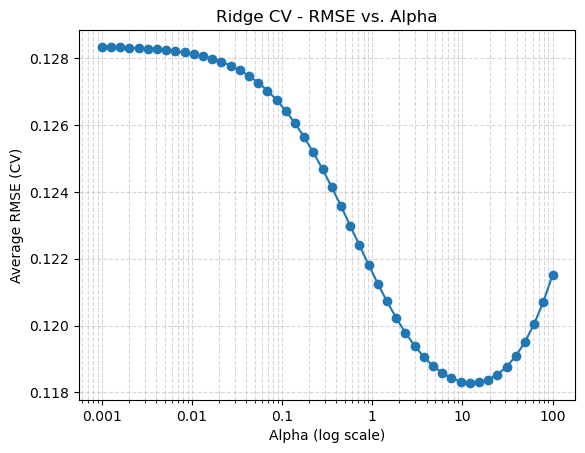

In [52]:
# -------------------------------
# Ridge Regression with Cross-Validation (Improvements 6 & 7)
# -------------------------------

# Define a range of alpha values
alphas = np.logspace(-3, 2, 50)
kf = KFold(n_splits=12, random_state=7, shuffle=True)

# Use RidgeCV to select the best alpha
ridge_cv = RidgeCV(alphas=alphas, cv=kf, scoring='neg_mean_squared_error')
ridge_cv.fit(processed_train_data, train['SalePrice'])
best_alpha = ridge_cv.alpha_
print(f"Optimal alpha from RidgeCV: {best_alpha:.4f}")

# Optionally, evaluate performance across alphas using cross-validation
test_scores = []
for alpha in alphas:
    clf = Ridge(alpha=alpha)
    neg_mse = cross_val_score(clf, processed_train_data, train['SalePrice'], cv=40, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-neg_mse)
    test_scores.append(rmse.mean())

best_index = np.argmin(test_scores)
best_score = test_scores[best_index]
print(f"Best RMSE from CV: {best_score:.4f}")

# Plot RMSE vs. Alpha
plt.plot(alphas, test_scores, marker='o')
plt.xscale('log')
plt.xlabel("Alpha (log scale)")
plt.ylabel("Average RMSE (CV)")
plt.title("Ridge CV - RMSE vs. Alpha")
tick_values = [0.001, 0.01, 0.1, 1, 10, 100]
plt.xticks(tick_values, tick_values)
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()

# MODEL BUILDING

# Prediction

In [76]:
X_train = train.drop('SalePrice', axis=1)
y_train = train['SalePrice']


In [78]:
from sklearn.linear_model import Ridge

ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('ridge', Ridge(alpha = 9.5410, max_iter=10000))
])

set_config(display="diagram")
ridge_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_cont',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LotFrontage', 'LotArea',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', '3SsnPorch',
                                                   'Scre...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['MSSubClass', 'MSZoning',
                                                   'Street', 'LandContour',
                                                   'LotConfig', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'Foundation', 'Heating',
                                                   'Electrical', 'GarageType',
                                                   'SaleType', 'CentralAir',
                                                   'SaleCondition'])])),
                ('ridge', Ridge(alpha=9.541, max_iter=10000))])

In [80]:
from sklearn.linear_model import Lasso


lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('lasso', Lasso(alpha = 0.0005, max_iter=10000))
])

set_config(display="diagram")
lasso_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_cont',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LotFrontage', 'LotArea',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', '3SsnPorch',
                                                   'Scre...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['MSSubClass', 'MSZoning',
                                                   'Street', 'LandContour',
                                                   'LotConfig', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'Foundation', 'Heating',
                                                   'Electrical', 'GarageType',
                                                   'SaleType', 'CentralAir',
                                                   'SaleCondition'])])),
                ('lasso', Lasso(alpha=0.0005, max_iter=10000))])

In [82]:
from sklearn.ensemble import VotingRegressor
ensemble_regressor = VotingRegressor([
    ('ridge', ridge_pipeline),
    ('lasso', lasso_pipeline)
])

ensemble_regressor.fit(X_train, y_train)

VotingRegressor(estimators=[('ridge',
                             Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num_cont',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['LotFrontage',
                                                                                'LotArea',
                                                                                'YearBuilt',
                                                                                'YearRemodAdd',
                                                                                'MasVnrArea',
                                                                                'BsmtFinSF1',
                                                                                'BsmtFinSF2',
                                                                                'BsmtUnfSF',
                                                                                '1stFlrSF',
                                                                                '2ndFlrSF',
                                                                                'LowQualFinSF',
                                                                                'WoodDeckSF',
                                                                                'OpenPorch...
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['MSSubClass',
                                                                                'MSZoning',
                                                                                'Street',
                                                                                'LandContour',
                                                                                'LotConfig',
                                                                                'Neighborhood',
                                                                                'Condition1',
                                                                                'Condition2',
                                                                                'BldgType',
                                                                                'HouseStyle',
                                                                                'RoofStyle',
                                                                                'RoofMatl',
                                                                                'Exterior1st',
                                                                                'Exterior2nd',
                                                                                'Foundation',
                                                                                'Heating',
                                                                                'Electrical',
                                                                                'GarageType',
                                                                                'SaleType',
                                                                                'CentralAir',
                                                                                'SaleCondition'])])),
                                      

In [84]:
test = pd.read_csv("../input/test.csv")
# Save the test IDs for submission
test_ids = test["Id"]

# Apply the same column-dropping steps to the test data
test = test.drop(columns=[col for col in drop_list if col in test.columns], errors='ignore')


test['Years_Since_Remod'] = test['YrSold'] - test['YearRemodAdd']
test['Age']               = test['YrSold'] - test['YearBuilt']
test['Newness']           = test['Age'] * test['Years_Since_Remod']
test['Total_Home_Quality'] = test['OverallQual'] + test['OverallCond']



# In Kaggle test data, the target is not provided so drop "Id" and use the rest as features.
X_test = test.drop("Id", axis=1)

# ------------------------------
# 3. Make Predictions & Create Submission File
# ------------------------------
loged_predictions = ridge_pipeline.predict(X_test)
predictions = np.expm1(loged_predictions)
submission = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": predictions
})

submission.to_csv("../submission.csv", index=False)
print("Submission file saved as submission.csv")

Submission file saved as submission.csv
